In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
data = pd.read_csv('/content/HR_capstone_dataset.csv')

In [ ]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = data.isna().sum()
df

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df = data.duplicated().sum()
df

3008

In [ ]:
df = data.drop_duplicates(keep='first')
df.head()
df.shape

(11991, 10)

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [ ]:
df1 = pd.get_dummies(df, drop_first=True,columns=['Department'] )

In [ ]:

bool_cols = df1.select_dtypes(include= 'bool').columns
df1[bool_cols] = df1[bool_cols].astype(int)

In [ ]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


In [ ]:
X = df1.drop(['salary'], axis=1)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
num_clusters = [i for i in range(2, 16)]

def kmeans_inertia(num_clusters, x_vals, n_init=10):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=n_init)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [ ]:
inertia = kmeans_inertia(num_clusters, X_scaled)

In [ ]:
inertia

[188579.94116277318,
 175900.29454255628,
 162870.60491593584,
 149430.00151034707,
 137483.17788442632,
 124808.34790938733,
 112115.41649009274,
 104770.30917573246,
 92770.58923248127,
 84908.82398377983,
 82701.60536738971,
 75208.34860573857,
 73296.17572806403,
 70228.01526600191]

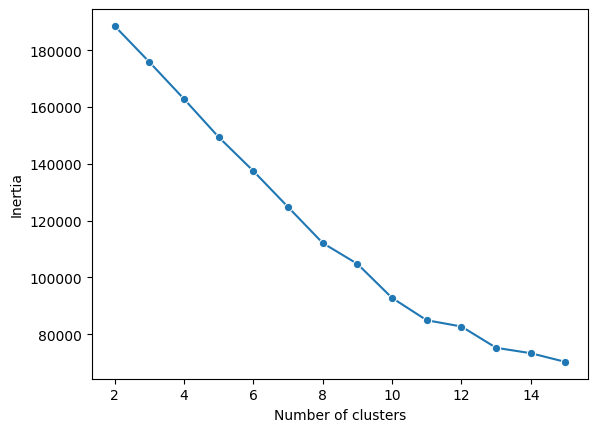

In [ ]:

plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [ ]:
def kmeans_sil(num_clusters, x_vals, n_init=10):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value.
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42,n_init=n_init)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.059285427793463547,
 0.0923309532567054,
 0.13476332145701034,
 0.18043994410885436,
 0.19943351942269574,
 0.22679264203734031,
 0.2633095164150965,
 0.2704132020751932,
 0.2980701869145834,
 0.3080276264357991,
 0.31191709647838883,
 0.306901351745388,
 0.28933615108129074,
 0.2626496700449509]

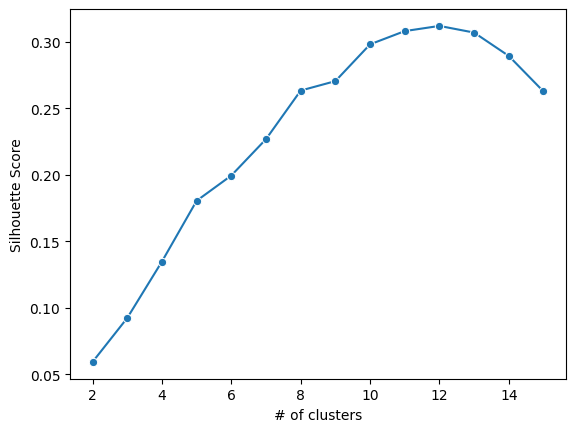

In [ ]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

In [ ]:
kmeans11 = KMeans(n_clusters = 12, random_state=42)
kmeans11.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12, random_state=42)

In [ ]:
print('Unique labels:', np.unique(kmeans11.labels_))

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
df1['kmeans_clusters']= kmeans11.labels_
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,cluster,kmeans_clusters
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0,5,5
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0,2,2
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0,2,2
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0,2,2
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0,5,5


In [ ]:
df1.groupby(by=['cluster','salary','left']).size().sort_values(ascending=False)

cluster  salary  left
0        low     0       1224
         medium  0       1185
1        low     0        892
         medium  0        784
3        medium  0        703
                         ... 
8        high    1          3
7        medium  1          3
1        high    1          2
5        high    0          1
4        high    1          1
Length: 69, dtype: int64

In [ ]:
df1['cluster'].value_counts()

cluster
0     2631
1     1841
3     1513
4     1185
2      798
9      686
6      673
8      646
5      614
11     611
10     590
7      203
Name: count, dtype: int64

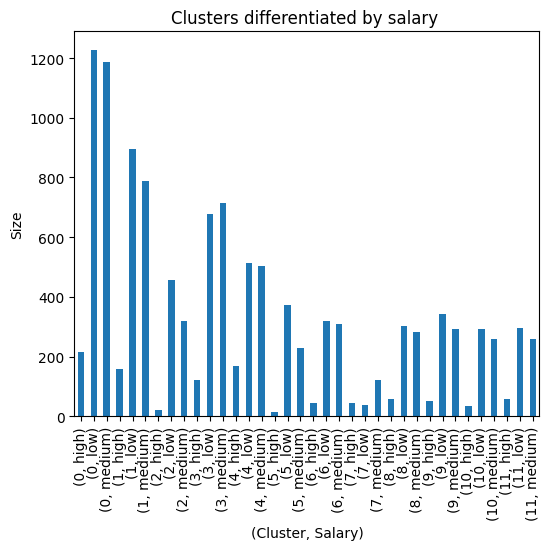

In [ ]:
df1.groupby(by=['cluster', 'salary']).size().plot.bar(title='Clusters differentiated by salary ',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Salary)');

In [ ]:
df1.groupby(by=['cluster','salary', 'left']).size().sort_values(ascending = False)

cluster  salary  left
0        low     0       1224
         medium  0       1185
1        low     0        892
         medium  0        784
3        medium  0        703
                         ... 
8        high    1          3
7        medium  1          3
1        high    1          2
5        high    0          1
4        high    1          1
Length: 69, dtype: int64

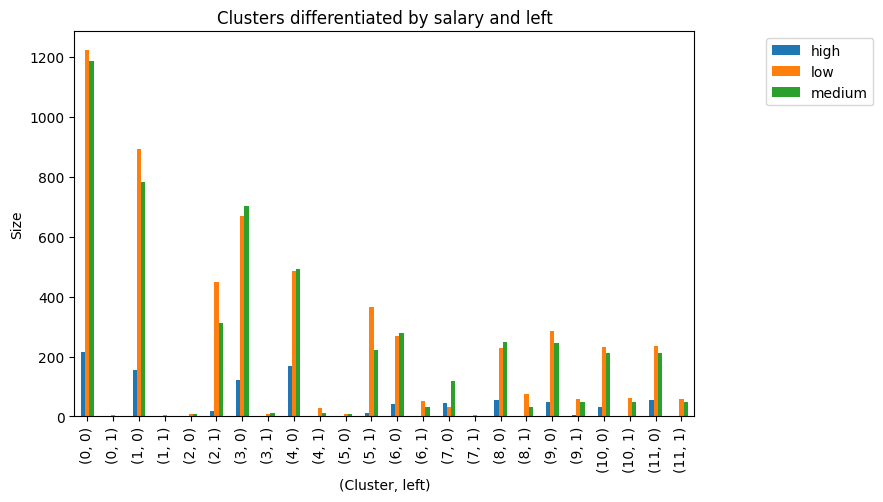

In [ ]:
df1.groupby(by=['cluster','salary','left']).size().unstack(level = 'salary', fill_value=0).plot.bar(title='Clusters differentiated by salary and left',
                                                                                                                      figsize=(8, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, left)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

**SUMMARY**

--> It seems 12 number of clusters are reasonable.

--> we validate it throught sillhoute scores where 12 has the closest
    score to 1.

--> Each cluster can be differentiate by salary levels as well as by
    the 'left' feature in the data.

--> Cluster 0,1,3 and 4 has the large number of data distribution .

--> Most highest salary category among all is 'Low'.   


